# Syed Usama Ali
# FA22-MSCS-0012

# Used Car Market In Pakistan

# Objective:
### Create a model that uses the properties of used cars to estimate their price with accuracy. 
### To determine market trends in the used cars sector.

# Sourse:
### The dataset is downloaded from Kaggle.com

# Business Question:
### Based on a used car's attributes, is it possible to determine its selling price with accuracy?

# About Dataset
### This data has been scraped from PakWheels, the most renowned second-hand Car Selling company's website. The data contains approximately more than 78,000 cars with 13 different features and price as target. The feature names are:

##### ad_ref: a unique ad referance
##### city: advertisement city (location where vehicle is sold)
##### assembly: imported or not (local)
##### body: body type of vehicle
##### make: manufacturer of vehicle
##### model: model variant of vehicle
##### year: year of production
##### engine_cc: engine volume of vehicle
##### transmission: Auto/Manual
##### fuel_type: petrol, diesel of hybrid
##### color: color of vehicle
##### registered: registration number city/province of vehicle
##### mileage: mileage in kms
##### price: price of vehicle in PKR

# Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)

In [2]:
data = pd.read_csv('pakweelData.csv')

In [3]:
print("Initially Dataset cotains {0} rows and {1} columns ".format(data.shape[0], data.shape[1]))

Initially Dataset cotains 77878 rows and 14 columns 


In [4]:
data.head()

,addref,city,assembly,body,make,model,year,engine,transmission,fuel,color,registered,mileage,price
0,7943732,Peshawar,NaN,Sedan,Toyota,Corolla,2013.0,1300.0,Manual,Petrol,Silver Metallic,Lahore,145000,2870000.0
1,7730314,Lahore,NaN,Sedan,Honda,City,2000.0,1300.0,Manual,Petrol,Blue,Lahore,230000,995000.0
2,7943737,Lahore,NaN,Sedan,Toyota,Yaris,2021.0,1300.0,Manual,Petrol,Super White,Punjab,60500,3585000.0
3,7943733,Lahore,NaN,Hatchback,Suzuki,Swift,2017.0,1300.0,Manual,Petrol,Grey,Islamabad,87000,2250000.0
4,7923484,Lahore,NaN,Sedan,Honda,Civic,2017.0,1800.0,Automatic,Petrol,Grey,Lahore,86000,4850000.0


In [5]:
data.isna().sum()

addref              0
city                0
assembly        53689
body             8904
make                0
model               0
year             4779
engine              3
transmission        0
fuel              906
color            1480
registered          0
mileage             0
price             583
dtype: int64

In [6]:
data[~data['assembly'].isna()]

,addref,city,assembly,body,make,model,year,engine,transmission,fuel,color,registered,mileage,price
5,7943736,Vehari,Imported,Sedan,Honda,Civic,2010.0,1300.0,Automatic,Petrol,Albastar Silver,Punjab,157000,2850000.0
8,7894559,Lahore,Imported,Hatchback,Daihatsu,Move,2019.0,660.0,Automatic,Petrol,Fire Quartz Red,Un-Registered,22517,3850000.0
10,7907725,Lahore,Imported,Hatchback,Daihatsu,Move,2019.0,660.0,Automatic,Petrol,Unique Orange,Un-Registered,77450,3650000.0
13,7894570,Lahore,Imported,Hatchback,Daihatsu,Move,2019.0,660.0,Automatic,Petrol,Silver,Un-Registered,47499,3850000.0
14,7929705,Lahore,Imported,Hatchback,Daihatsu,Move,2019.0,660.0,Automatic,Petrol,Pearl White III,Un-Registered,69951,3550000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77868,7772762,Islamabad,Imported,NaN,Suzuki,Every,2012.0,660.0,Automatic,Petrol,Silver,Islamabad,150000,1800000.0
77871,7772754,Lahore,Imported,Hatchback,Nissan,Dayz,2013.0,659.0,Automatic,Petrol,NaN,Lahore,90000,2300000.0
77874,7772775,Abbottabad,Imported,Hatchback,Suzuki,Alto,2015.0,660.0,Automatic,Petrol,Brown,Islamabad,65000,2420000.0
77875,7773716,Faisalabad,Imported,Crossover,MG,HS,2021.0,1490.0,Automatic,Petrol,Arctic White,Un-Registered,5000,7500000.0


In [7]:
#dealing with missing data in assembly column
data['assembly'] = data['assembly'].fillna('Local')

In [8]:
print(data.isna().sum())
print("\nNow 'assembly' column has 0 null values")

addref             0
city               0
assembly           0
body            8904
make               0
model              0
year            4779
engine             3
transmission       0
fuel             906
color           1480
registered         0
mileage            0
price            583
dtype: int64

Now 'assembly' column has 0 null values


In [9]:
data.dropna(subset=['color', 'year'], inplace=True)

In [10]:
print(data.isna().sum())
print("\nNow 'color' and 'year 'columns has 0 null values")

addref             0
city               0
assembly           0
body            7409
make               0
model              0
year               0
engine             2
transmission       0
fuel             715
color              0
registered         0
mileage            0
price            380
dtype: int64

Now 'color' and 'year 'columns has 0 null values


In [11]:
data[data['engine'].isna()]

,addref,city,assembly,body,make,model,year,engine,transmission,fuel,color,registered,mileage,price
467,7825716,Faisalabad,Imported,Hatchback,Toyota,Passo,2017.0,NaN,Automatic,Petrol,Bright Silver Metallic,Islamabad,81331,3600000.0
940,7876906,Lahore,Imported,Hatchback,Toyota,Passo,2018.0,NaN,Automatic,Petrol,Green,Karachi,51483,3500000.0


In [12]:
data.loc[data['engine'].isna(), 'engine'] = 1000.0

In [13]:
print(data.isna().sum())
print("\nNow 'engine' columns has 0 null values")

addref             0
city               0
assembly           0
body            7409
make               0
model              0
year               0
engine             0
transmission       0
fuel             715
color              0
registered         0
mileage            0
price            380
dtype: int64

Now 'engine' columns has 0 null values


In [14]:
#Updating all body column where body should be 'Crossover' 

cross = data[data['body'] == 'Crossover']
cross_list = cross['model'].to_list()
data.loc[data['model'].isin(cross_list), 'body'] = 'Crossover'

In [15]:
#Updating all body column where body should be 'Sedan' 

Sedan = data[data['body'] == 'Sedan']
Sedan_list = Sedan['model'].to_list()
data.loc[data['model'].isin(Sedan_list), 'body'] = 'Sedan'

In [16]:
#Updating all body column where body should be 'SUV'

suv = data[data['body']=='SUV']
suv_list = suv['model'].to_list()
data.loc[data['model'].isin(suv_list), 'body'] = 'SUV'

In [17]:
#Updating all body column where body should be 'Hatchback'

hatchback = data[data['body']=='Hatchback']
hatchback_list = hatchback['model'].to_list()
data.loc[data['model'].isin(hatchback_list), 'body'] = 'Hatchback'

In [18]:
#Updating all body column where body should be 'Micro Van'

MicV = data[data['body']=='Micro Van']
MicV_list = MicV['model'].to_list()
data.loc[data['model'].isin(MicV_list), 'body'] = 'Micro Van'

In [19]:
#Updating all body column where body should be 'Mini Van'

MinV = data[data['body']=='Mini Van']
MinV_list = MinV['model'].to_list()
data.loc[data['model'].isin(MinV_list), 'body'] = 'Mini Van'

In [20]:
#Updating all body column where body should be 'Station Wagon,Van'

StaW = data[data['body']=='Station Wagon']
StaW_list = StaW['model'].to_list()
data.loc[data['model'].isin(StaW_list), 'body'] = 'Station Wagon,Van'

Van = data[data['body']=='Van']
Van_list = Van['model'].to_list()
data.loc[data['model'].isin(Van_list), 'body'] = 'Station Wagon,Van'

In [21]:
#Updating all body column where body should be 'Convertible'

conv = data[data['body']=='Convertible']
conv_list = conv['model'].to_list()
data.loc[data['model'].isin(conv_list), 'body'] = 'Convertible'

In [22]:
#Updating all body column where body should be 'Pick Up'

picup = data[data['body']=='Pick Up']
picup_list = picup['model'].to_list()
data.loc[data['model'].isin(picup_list), 'body'] = 'Pick Up'

In [23]:
#Updating all body column where body should be 'MPV'

mpv = data[data['body']=='MPV']
mpv_list = mpv['model'].to_list()
data.loc[data['model'].isin(mpv_list), 'body'] = 'MPV'

In [24]:
#Updating all body column where body should be 'Coupe'

cou = data[data['body']=='Coupe']
cou_list = cou['model'].to_list()
data.loc[data['model'].isin(cou_list), 'body'] = 'Coupe'

data.loc[data['model'] == '6', 'body'] = 'Coupe'

In [25]:
#Updating all body column where body should be 'Compact sedan'

compSe = data[data['body']=='Compact sedan']
compSe_list = compSe['model'].to_list()
data.loc[data['model'].isin(compSe_list), 'body'] = 'Compact sedan'

In [26]:
data.isna().sum()

addref            0
city              0
assembly          0
body            328
make              0
model             0
year              0
engine            0
transmission      0
fuel            715
color             0
registered        0
mileage           0
price           380
dtype: int64

In [27]:
#Deleting remaining Null values in body colun
data.dropna(subset=['body'], inplace=True)

In [28]:
print(data.isna().sum()) 
print("Now 'body' column has 0 null values")

addref            0
city              0
assembly          0
body              0
make              0
model             0
year              0
engine            0
transmission      0
fuel            703
color             0
registered        0
mileage           0
price           374
dtype: int64
Now 'body' column has 0 null values


In [29]:
data['fuel'].value_counts()

fuel
Petrol    65285
Hybrid     2687
Diesel     2664
Name: count, dtype: int64

In [30]:
for i in ['Petrol','Diesel', 'Hybrid']:
    fuel = data[data['fuel']==i]
    fuel_list = fuel['model'].to_list()
    data.loc[data['model'].isin(fuel_list), 'fuel'] = i

In [31]:
print(data.isna().sum()) 

addref            0
city              0
assembly          0
body              0
make              0
model             0
year              0
engine            0
transmission      0
fuel             70
color             0
registered        0
mileage           0
price           374
dtype: int64


In [32]:
na_car = data[data['fuel'].isna()]
na_car_list = na_car['model'].to_list()
print(set(na_car_list))

{'iX3', 'iX', 'e-tron', 'Sakura', 'Taycan', 'GV60', 'i4', 'Model', 'UX'}


In [33]:
#Updating all remaning column where fuel should be 'Electric'
data.loc[data['model'].isin(set(na_car_list)), 'fuel'] = 'Electric'

In [34]:
print(data.isna().sum())
print("\nNow 'fuel' column has 0 null values")

addref            0
city              0
assembly          0
body              0
make              0
model             0
year              0
engine            0
transmission      0
fuel              0
color             0
registered        0
mileage           0
price           374
dtype: int64

Now 'fuel' column has 0 null values


In [35]:
#dropping remaining missing values
data = data.dropna()

In [36]:
print(data.isna().sum())
print("\nNow dataset has 0 null values")

addref          0
city            0
assembly        0
body            0
make            0
model           0
year            0
engine          0
transmission    0
fuel            0
color           0
registered      0
mileage         0
price           0
dtype: int64

Now dataset has 0 null values


In [37]:
print(data[data.duplicated(subset=['addref'])])
print('\nThere are no duplicate values as every row has a unique ad reference')

Empty DataFrame
Columns: [addref, city, assembly, body, make, model, year, engine, transmission, fuel, color, registered, mileage, price]
Index: []

There are no duplicate values as every row has a unique ad reference


In [38]:
data.shape

(70965, 14)

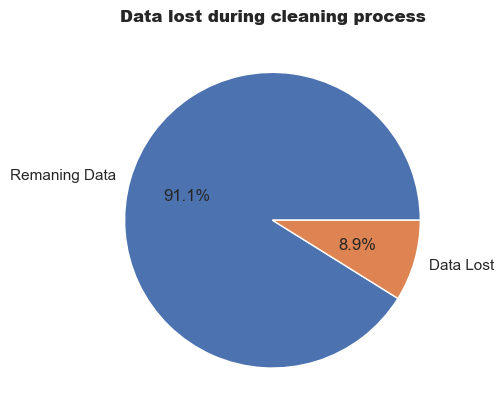

In [39]:
plt.pie([70965, 6913], normalize=True, labels=["Remaning Data", "Data Lost"], autopct='%1.1f%%')
plt.title('Data lost during cleaning process', fontweight="black", size=12 ,pad=10)
plt.show()

### 8.9% of data (6913 Rows) has been lost after cleaning process as shown in above pie chart

In [40]:
data.drop('addref', axis=1, inplace=True)

In [41]:
data.shape

(70965, 13)

# Data Analysis

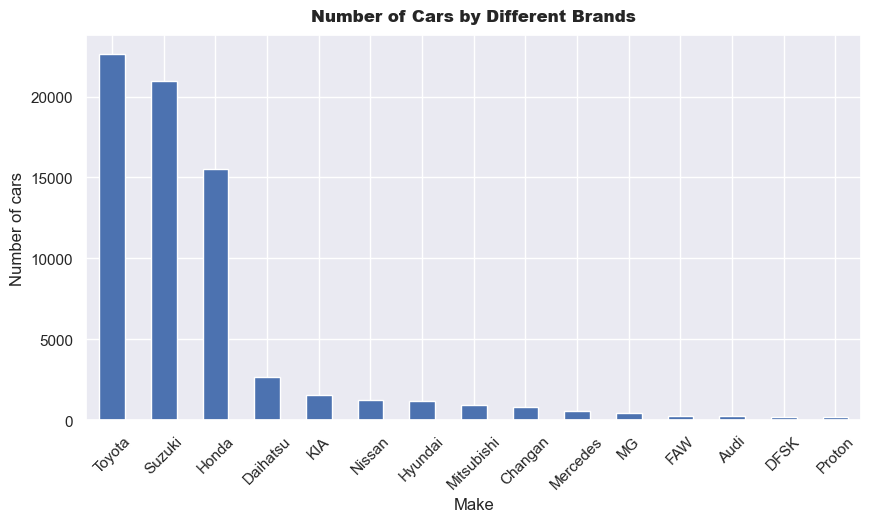

In [42]:
data['make'].value_counts().nlargest(15).plot(kind='bar', figsize=(10, 5))
plt.title('Number of Cars by Different Brands', fontweight="black", size=12 ,pad=10)
plt.ylabel('Number of cars')
plt.xlabel('Make')
plt.xticks(rotation=45)
plt.show()

### According to above graph Toyota, suzuki and honda have most numbers of used cars in the market

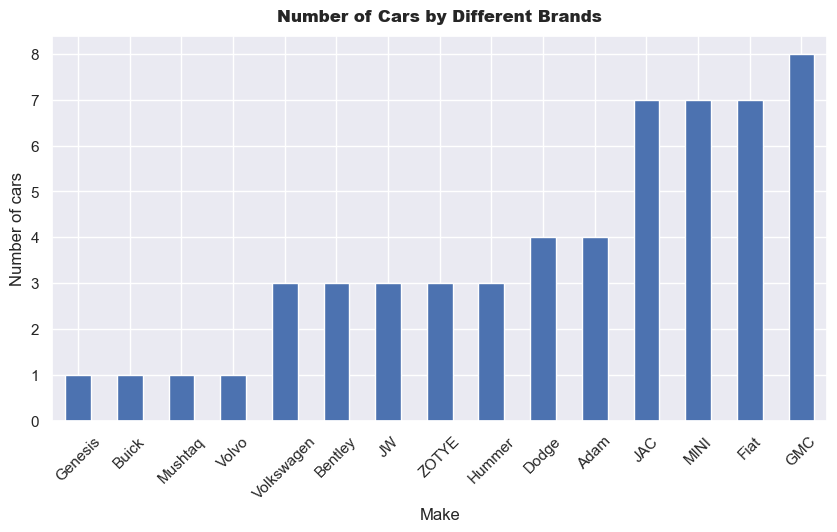

In [43]:
data['make'].value_counts().nsmallest(15).plot(kind='bar', figsize=(10, 5))
plt.title('Number of Cars by Different Brands', fontweight="black", size=12 ,pad=10)
plt.ylabel('Number of cars')
plt.xlabel('Make')
plt.xticks(rotation=45)
plt.show()

### According to above graph these brands have least number of cars in Pakistan

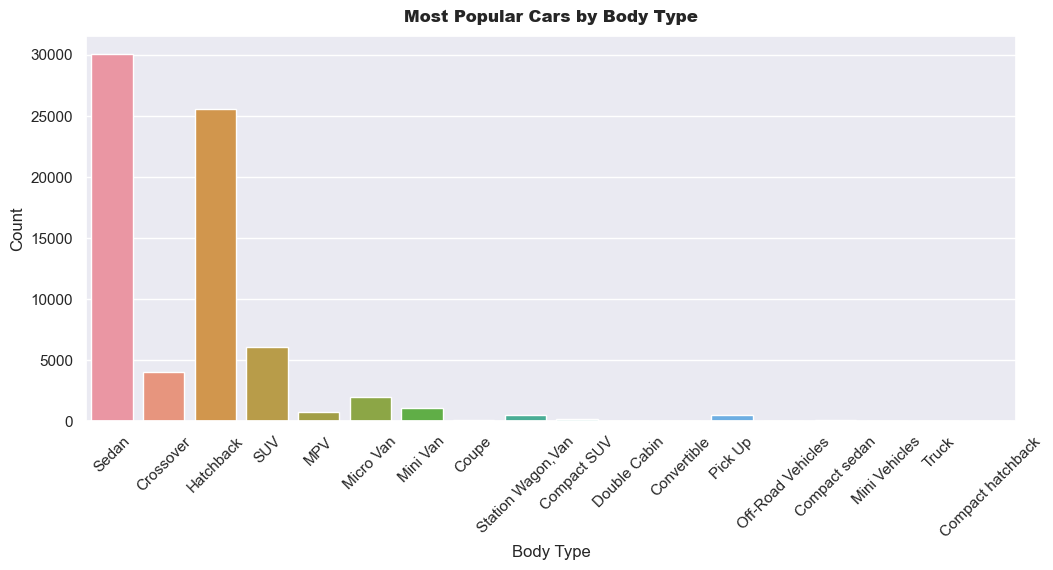

In [44]:
plt.figure(figsize=(12,5))
sns.countplot(data, x='body')
plt.xticks(rotation=45)
plt.title('Most Popular Cars by Body Type', fontweight="black", size=12 ,pad=10)
plt.xlabel('Body Type')
plt.ylabel('Count')
plt.show()

### Acording to above graph most number of used cars are 'Sedan' and then 'Hatchback' 

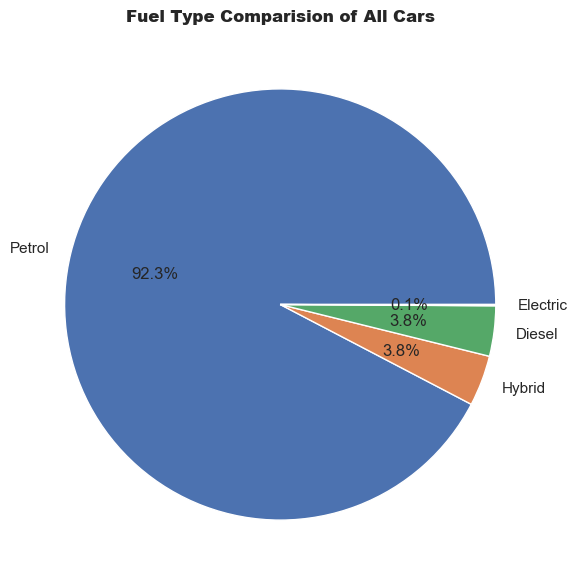

In [45]:
plt.figure(figsize=(8,7))
fuel = ['Petrol', 'Hybrid', 'Diesel', 'Electric']    
index = [65285, 2687, 2664, 66]
plt.pie(index, labels=fuel, autopct='%1.1f%%')
plt.title('Fuel Type Comparision of All Cars', fontweight="black", size=12 ,pad=10)
plt.show()

###  According above pie chart around 92% of vehicles are Petrol type

In [46]:
toyota = data[data['make'] == 'Toyota']
Suzuki = data[data['make'] == 'Suzuki']
Honda = data[data['make'] == 'Honda']

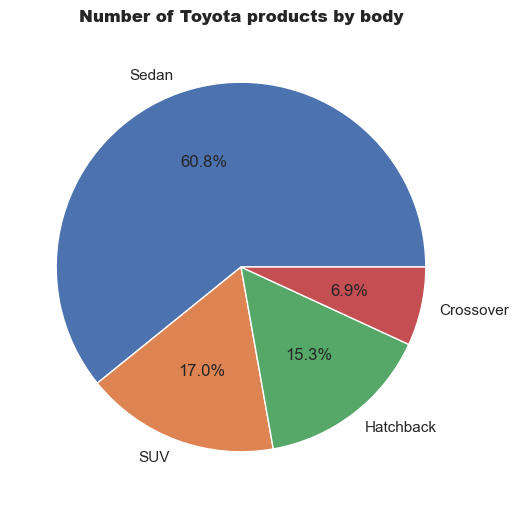

In [47]:
plt.figure(figsize=(8,6))
plt.pie(toyota['body'].value_counts().head(4).values,labels=toyota['body'].value_counts().head(4).index, autopct='%1.1f%%')
plt.title('Number of Toyota products by body', fontweight="black", size=12 ,pad=10)
plt.show()

### According to above pie chart most used cars of 'Toyota' are 'Sedan'

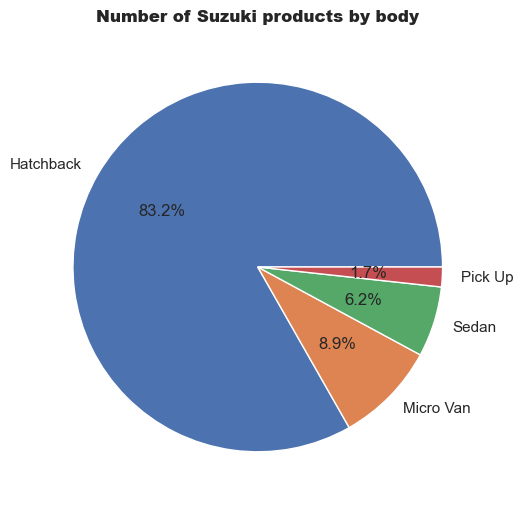

In [48]:
plt.figure(figsize=(8,6))
plt.pie(Suzuki['body'].value_counts().head(4).values,labels=Suzuki['body'].value_counts().head(4).index, autopct='%1.1f%%')
plt.title('Number of Suzuki products by body', fontweight="black", size=12 ,pad=10)
plt.show()

### According to above pie chart most used cars of 'Suzuki' are 'Hatchback'

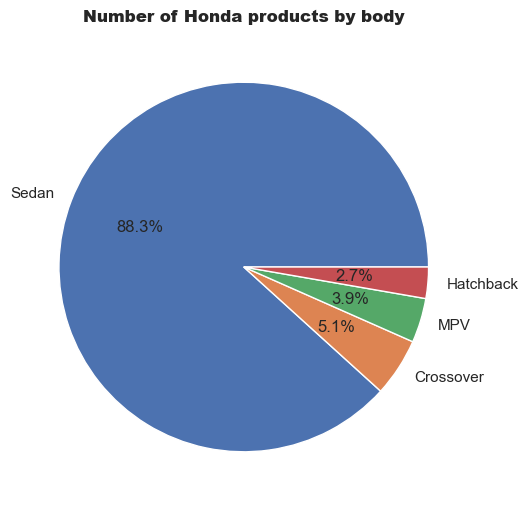

In [49]:
plt.figure(figsize=(8,6))
plt.pie(Honda['body'].value_counts().head(4).values,labels=Honda['body'].value_counts().head(4).index, autopct='%1.1f%%')
plt.title('Number of Honda products by body', fontweight="black", size=12 ,pad=10)
plt.show()

### According to above pie chart most used cars of 'Honda' are 'Sedan'

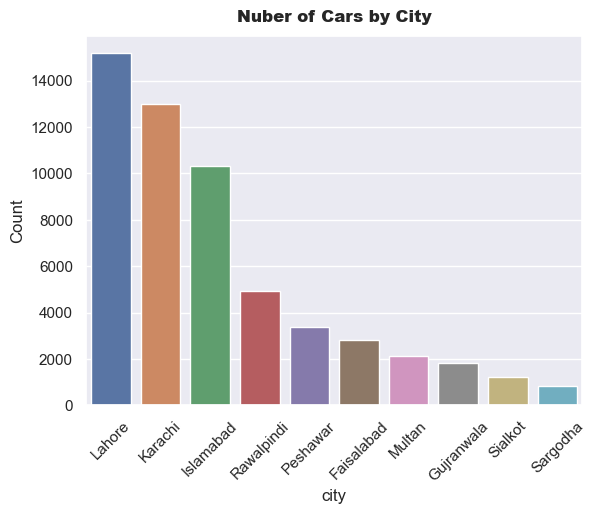

In [50]:
sns.barplot(x=data['city'].value_counts().head(10).index, y=data['city'].value_counts().head(10).values)
plt.ylabel('Count')
plt.title('Nuber of Cars by City', fontweight="black", size=12 ,pad=10)
plt.xticks(rotation=45)
plt.show()

###  According to above graph 'Lahore', 'Karachi' and 'Islamabad' have most number used cars for sale

In [51]:
#average price of cars per city
lowest_avg_price_city = data.groupby(['city','body'])['price'].mean().reset_index().sort_values(by='price', ascending=True).head(10)
lowest_avg_price_city

,city,body,price
552,Kamber,Hatchback,180000.000000
825,Mirpur,Compact sedan,290000.000000
820,Minchanabad,Micro Van,350000.000000
1215,Sumandari,Compact sedan,370000.000000
575,Karachi,Compact sedan,390285.714286
630,Khanewal,Pick Up,400000.000000
431,Hyderabad,Compact sedan,400000.000000
10,Abdul,Compact sedan,400000.000000
135,Chakwal,Compact sedan,430000.000000
995,Qasba,Hatchback,430000.000000


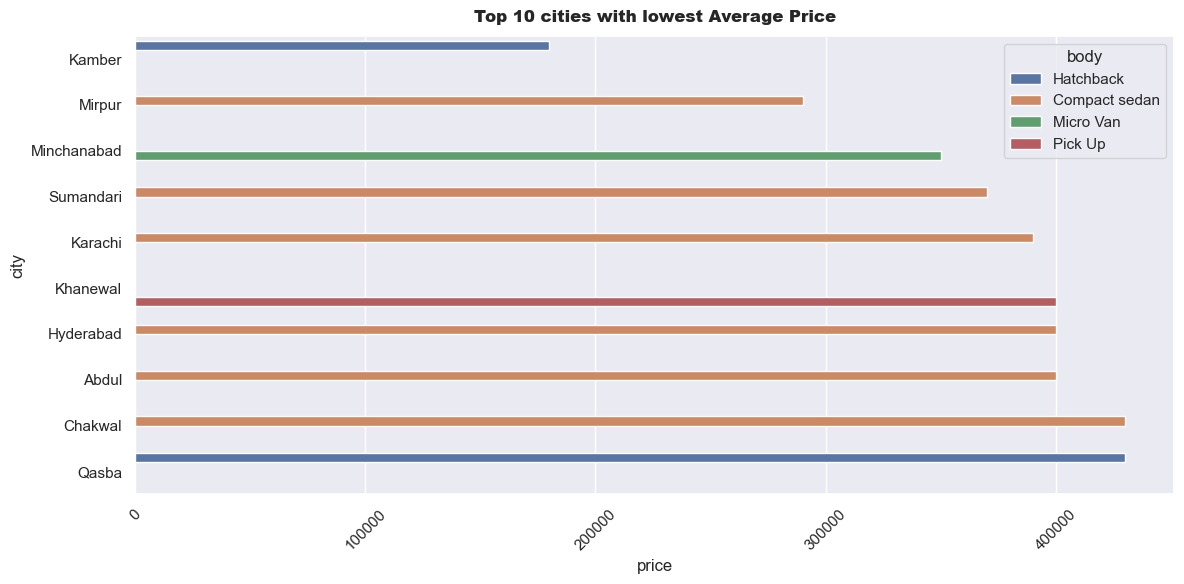

In [52]:
plt.figure(figsize=(12,6))
sns.barplot(x='price', y='city', data=lowest_avg_price_city, hue='body')
plt.xticks(rotation=90)
plt.xticks(rotation=45)
plt.title('Top 10 cities with lowest Average Price', fontweight="black", size=12 ,pad=10)
plt.tight_layout()
plt.show()

In [53]:
#average price of cars per city
highest_avg_price_city = data.groupby(['city','body'])['price'].mean().reset_index().sort_values(by='price', ascending=False).head(10)
highest_avg_price_city

,city,body,price
559,Kamoke,SUV,1.680000e+07
282,Faisalabad,Off-Road Vehicles,1.630000e+07
303,Fort,SUV,1.620000e+07
585,Karachi,Off-Road Vehicles,1.575000e+07
714,Lahore,Off-Road Vehicles,1.540000e+07
590,Karachi,Truck,1.497500e+07
415,Hayatabad,SUV,1.470000e+07
1154,Shakargarh,SUV,1.450000e+07
31,Alipur,SUV,1.390000e+07
716,Lahore,SUV,1.332739e+07


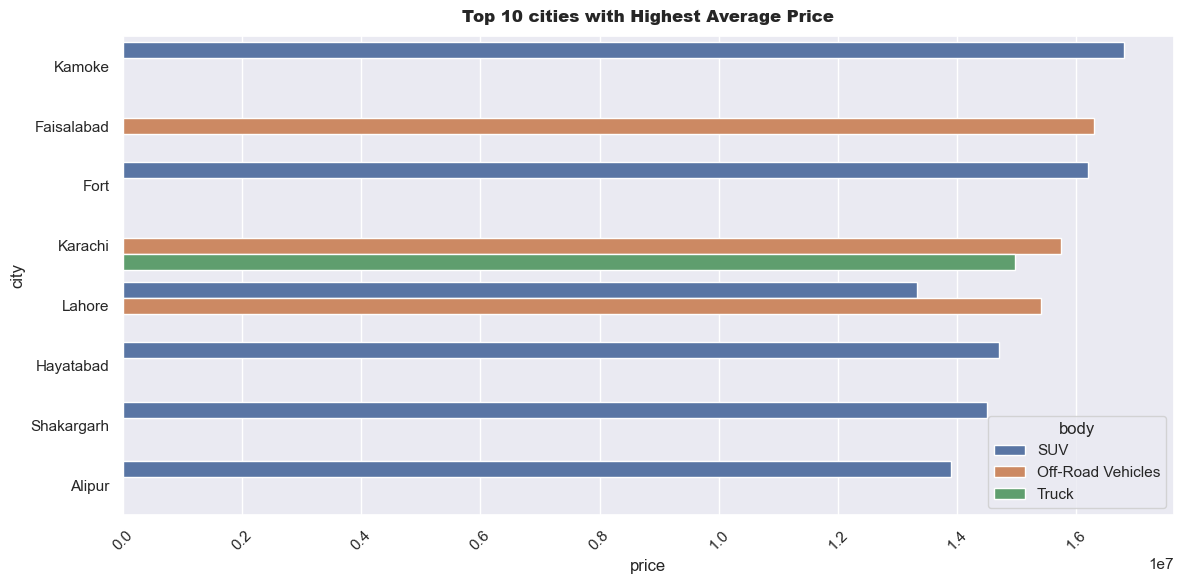

In [54]:
plt.figure(figsize=(12,6))
sns.barplot(x='price', y='city', data=highest_avg_price_city, hue='body')
plt.xticks(rotation=90)
plt.xticks(rotation=45)
plt.title('Top 10 cities with Highest Average Price', fontweight="black", size=12 ,pad=10)
plt.tight_layout()
plt.show()

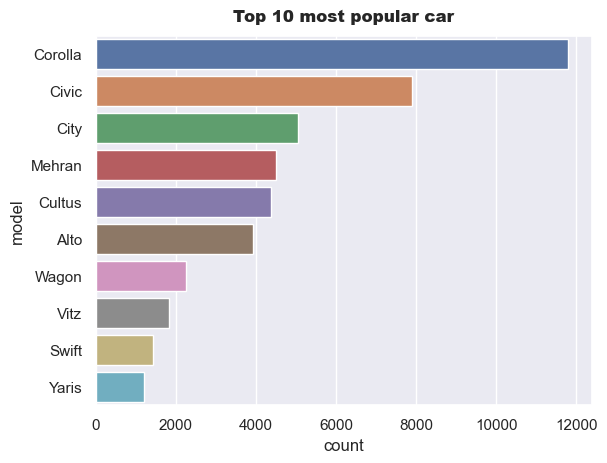

In [55]:
sns.countplot(data=data, y='model', order=data['model'].value_counts().head(10).index)
plt.title('Top 10 most popular car',fontweight="black", size=12 ,pad=10)
plt.show()

### Corolla, Civic, City, Mehran, Cultus and Alto are the top 6 most selling in Pakistan 

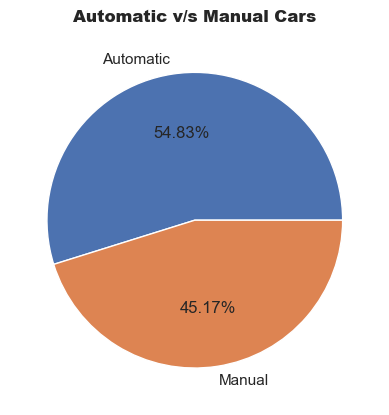

In [56]:
plt.pie(data['transmission'].value_counts().values, labels=data['transmission'].value_counts().index, autopct='%.2f%%')
plt.title('Automatic v/s Manual Cars',fontweight="black", size=12 ,pad=10)
plt.show()

### According to above graph 'Corolla', 'Civic' and 'City' are the most selling used cars in Pakistan

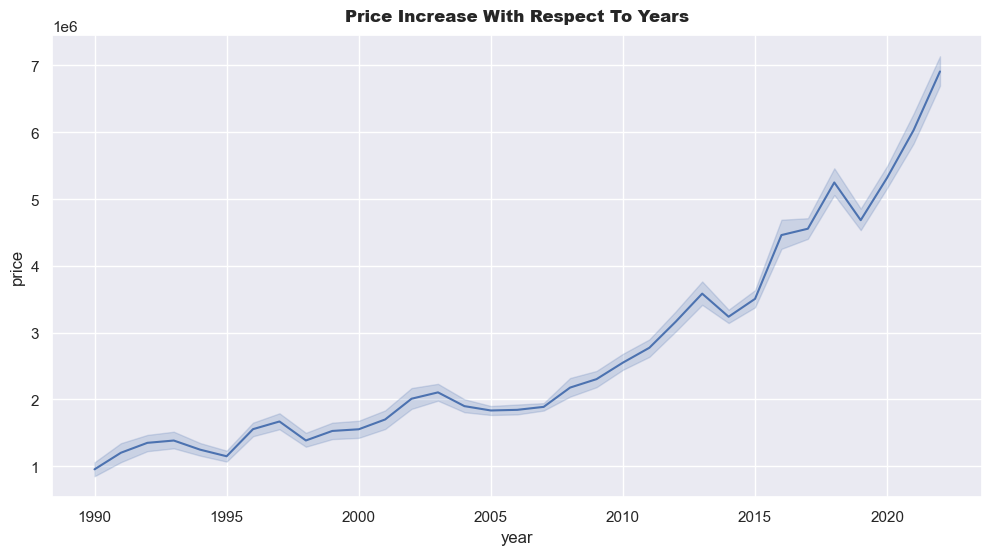

In [57]:
plt.figure(figsize=(12,6))
sns.lineplot(y='price', x='year', data=data)
plt.title('Price Increase With Respect To Years', fontweight="black", size=12 ,pad=10)
plt.show()

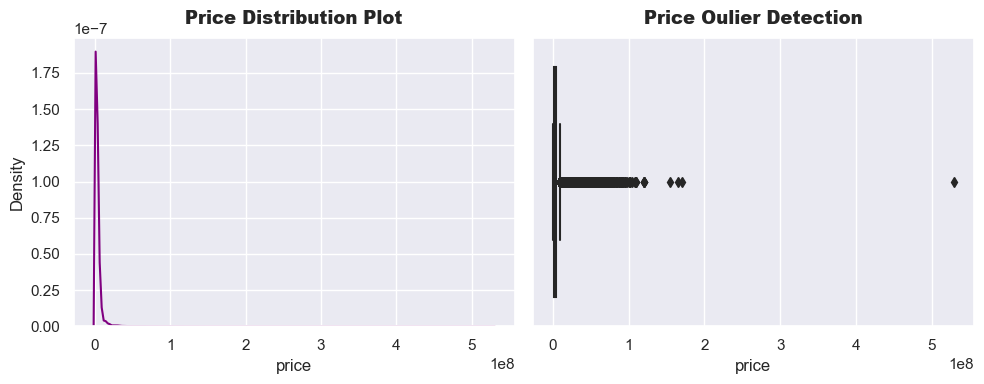

In [58]:
# Visualizing Price Column

plt.figure(figsize=(10,4))

plt.subplot(1, 2, 1)
sns.kdeplot(data=data, x="price",color="purple")
plt.title("Price Distribution Plot",fontweight="black",pad=10,size=13)

plt.subplot(1, 2, 2)
sns.boxplot(data=data, x= "price",color="purple")
plt.title("Price Oulier Detection",fontweight="black",pad=10,size=13)

plt.tight_layout()
plt.show()

### According to above graph 'Price' having right skewed due to the presence of postive outliers. and it also does not follow a normal disturbution, therefor we need to transform this column

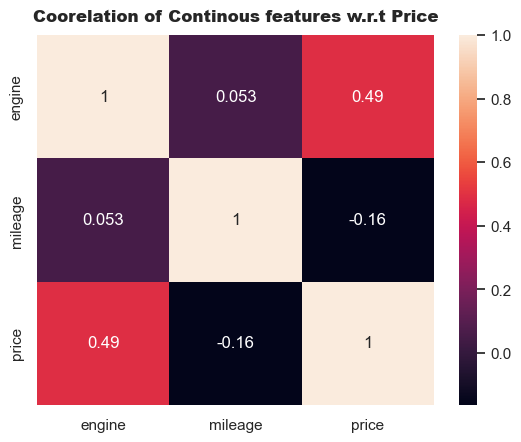

In [59]:
corr = data[["engine","mileage", "price"]].corr()
sns.heatmap(corr, annot=True)
plt.title("Coorelation of Continous features w.r.t Price", fontweight="black", size=12 ,pad=10)
plt.show()

### Enging fature has a positive coorelation with price and mileage has a very small negative coorelation with price

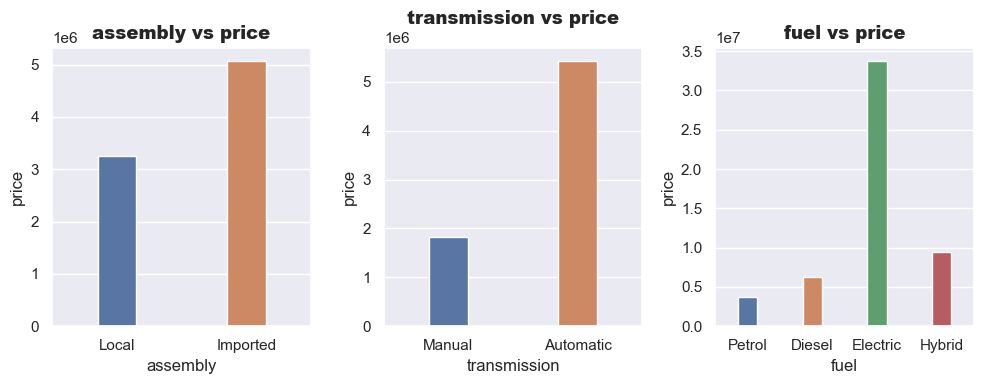

In [60]:
# Visualizing assembly, transmission and fuel Features w.r.t Price

plt.figure(figsize=(10,4))

plt.subplot(1, 3, 1)
sns.barplot(data=data, x='assembly', y="price", width=0.3, errorbar=None)
plt.title("assembly vs price", fontweight="black", size=13)

plt.subplot(1, 3, 2)
sns.barplot(data=data, x='transmission', y="price", errorbar=None, width=0.3)
plt.title("transmission vs price", fontweight="black", size=13)    

plt.subplot(1, 3, 3)
sns.barplot(data=data, x='fuel', y="price", errorbar=None, width=0.3)
plt.title("fuel vs price", fontweight="black", size=13)    

plt.tight_layout()
plt.show()

### According to above graphs
### Imported cars have high price as compare to locally assembled cars
### Automatic cars have high price as compare to Manual cars
### Electric cars have high price as compare to hybrib, diesel and petrol cars

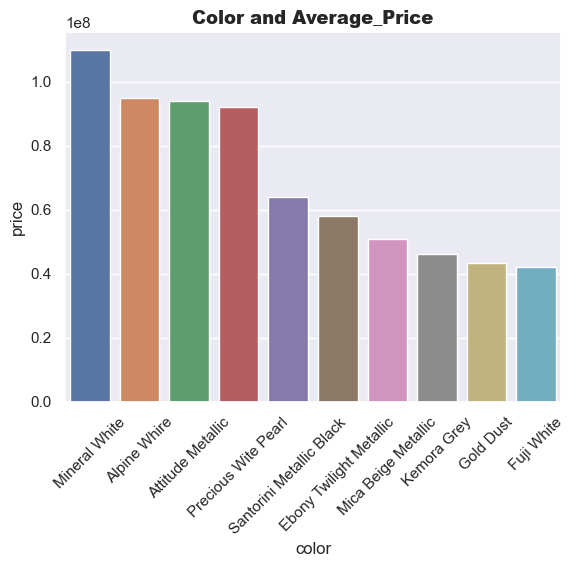

In [61]:
# visualizing Color feature w.r.t price

average_price_color = data.groupby("color")["price"].mean().reset_index().sort_values(ascending=False, by="price").head(10)
sns.barplot(x="color", y="price", data=average_price_color)
plt.title("Color and Average_Price", fontweight="black", size=13)
plt.xticks(rotation=45)
plt.show()

### Mineral White color has the highest average price  

In [62]:
# price column transformation
price_original = data["price"]

# Applying log transformation
data["price"] = np.log1p(data["price"])

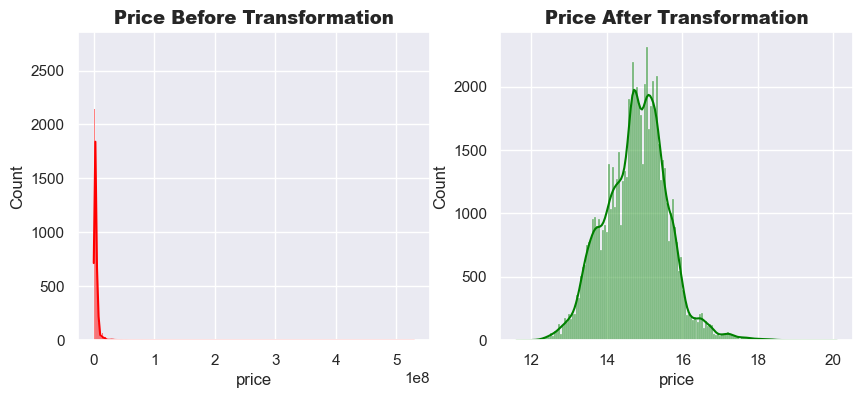

In [63]:
# Visualizing before and transformation of Price column

plt.figure(figsize=(10,4))

plt.subplot(1, 2, 1)
sns.histplot(x=price_original,  kde=True, color="red")
plt.title("Price Before Transformation", size=13 ,fontweight="black")

plt.subplot(1, 2, 2)
sns.histplot(x="price", data=data, kde=True, color="green")
plt.title("Price After Transformation", size=13 ,fontweight="black")

plt.show()

### After Transforming price column it follows near to normal distribution

In [64]:
# engine column transformation
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

engine_original = data["engine"]
data["engine"] = boxcox1p(data["engine"], boxcox_normmax(data["engine"] + 1))

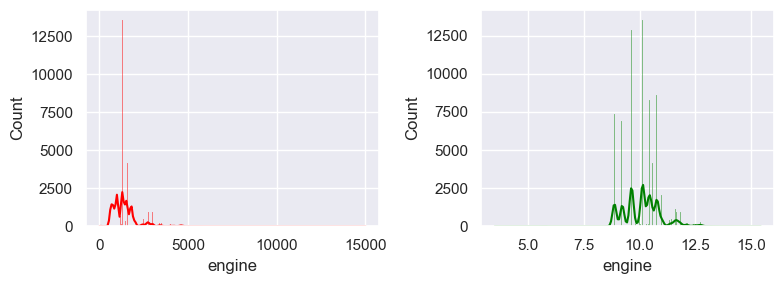

In [65]:
# Visualizing before and transformation of engine column

plt.figure(figsize=(8,3))

plt.subplot(1, 2, 1)
sns.histplot(x=engine_original, kde=True, color="red")

plt.subplot(1, 2, 2)
sns.histplot(x="engine", data=data, kde=True, color="green")
plt.tight_layout()
plt.show()

### It is observed that After transforming engine column skewness reduced

In [66]:
# engine Mileage transformation
mileage_original = data["mileage"]
data["mileage"] = boxcox1p(data["mileage"], boxcox_normmax(data["mileage"] + 1))

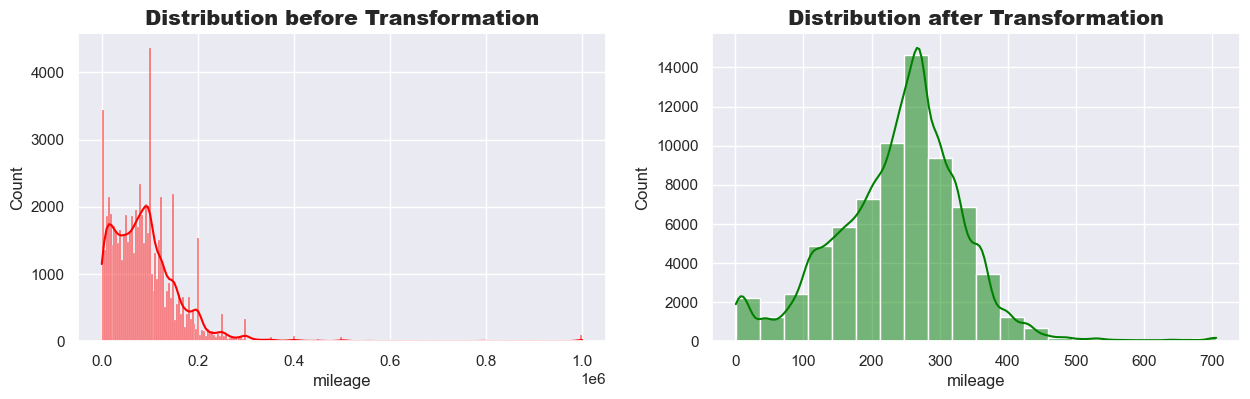

In [67]:
# Visualizing before and transformation of mileage column

plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.title("Distribution before Transformation", fontsize=15, fontweight="black")
sns.histplot(x=mileage_original, kde=True, color="red")


plt.subplot(1,2,2)
plt.title("Distribution after Transformation", fontsize=15, fontweight="black")
sns.histplot(data["mileage"], bins=20, kde=True , color="green", legend=False)

plt.xlabel("mileage")
plt.show()

### After transforming mileage column, skewness reduces also it follow near to normal distribution

In [68]:
# Applying target encoding on the following mentioned columns in cell
cat1_feat = ['year','body', 'make','city','color', 'registered', 'model']

for col in cat1_feat:
    df = data.groupby(col)["price"].mean()
    for value in df.index:
       data[col]= data[col].replace({value:df[value]})

In [69]:
cat2_cols= ['assembly', 'transmission', 'fuel']

dummy_data = pd.get_dummies(data, columns=cat2_cols, drop_first=True)

In [70]:
dummy_data.head()

,city,body,make,model,year,engine,color,registered,mileage,price,assembly_Local,transmission_Manual,fuel_Electric,fuel_Hybrid,fuel_Petrol
0,14.766353,14.905837,15.205276,15.003685,14.790122,10.138170,14.823485,14.554898,318.014234,14.869823,True,True,False,False,True
1,14.908519,14.905837,14.949997,14.840742,13.979527,10.138170,14.380380,14.554898,384.842942,13.810499,True,True,False,False,True
2,14.908519,15.551225,15.205276,15.328734,15.406133,10.138170,15.596752,14.893734,221.385093,15.092269,True,True,False,False,True
3,14.908519,14.292793,14.107509,14.727630,15.061956,10.138170,14.491800,15.096283,257.385313,14.626441,True,True,False,False,True
4,14.908519,14.905837,14.949997,14.920946,15.061956,10.774768,14.491800,14.554898,256.154972,15.394489,True,False,False,False,True


In [71]:
dummy_data.shape

(70965, 15)

In [72]:
# Separating Features and label
X = dummy_data.drop(columns="price", axis=1)
y = dummy_data["price"]

In [73]:
# Applying feature scaling

from sklearn.preprocessing import RobustScaler
scalar = RobustScaler()

In [74]:
X_scaled = scalar.fit_transform(X)

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_error

In [76]:
# Separating data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=45)

# Model Creation and Evaluation 

In [77]:
mse_value= []
rmse_value= []

# Function for model creation, visualizing and evaluation
def model_evaluation(model):
     model.fit(X_train, y_train)
     train_pred=model.predict(X_train)
     test_pred=model.predict(X_test)

     # metrices calculations
     mse= mean_squared_error(y_test, test_pred)
     rmse= np.sqrt(mse)

     #append the results
     mse_value.append(mse)
     rmse_value.append(rmse)

     print(f"MSE of {model} model is==> ", mse)
     print(f"RMSE of {model} model is==> ", rmse)

     #scatter plot
     plt.figure(figsize= (8,6))
     sns.scatterplot(x=y_test, y=test_pred, color="blue",label='Actual Data Points')
     plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", label="Ideal Line")
     plt.xlabel('True values')
     plt.ylabel('Predicted values')
     plt.legend()
     plt.title('Scatter Plot',fontweight="black",size=20,pad=10)
     plt.show()

MSE of LinearRegression() model is==>  0.06199062661984096
RMSE of LinearRegression() model is==>  0.24897916904801687


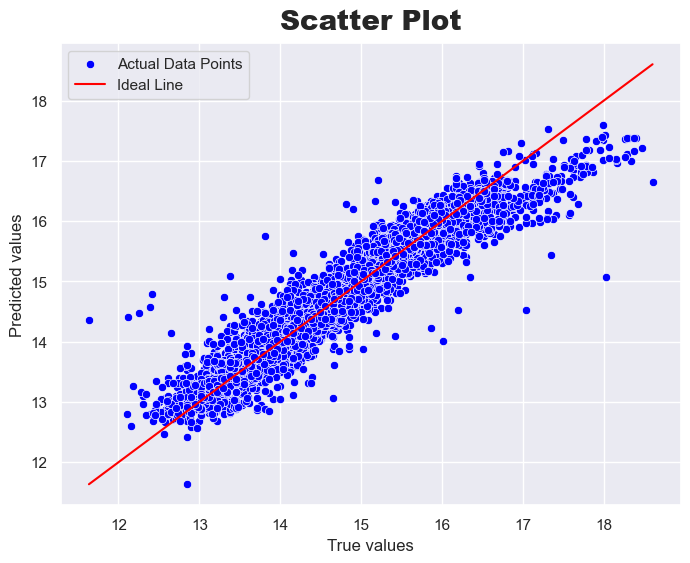

In [78]:
# Creating Linear Regression model 
model_evaluation(LinearRegression())

MSE of GradientBoostingRegressor() model is==>  0.035708723524992735
RMSE of GradientBoostingRegressor() model is==>  0.18896751976197584


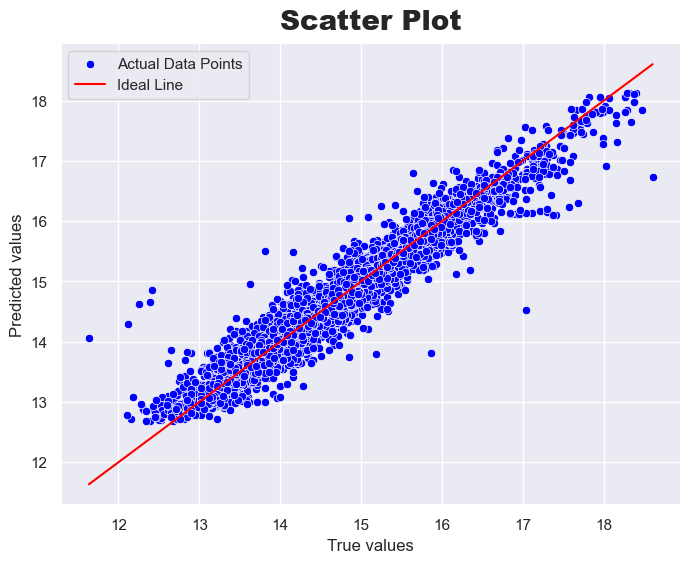

In [79]:
# Creating GradientBoostingRegressor Model
model_evaluation(GradientBoostingRegressor())

MSE of AdaBoostRegressor() model is==>  0.16510520095668138
RMSE of AdaBoostRegressor() model is==>  0.40633139302382404


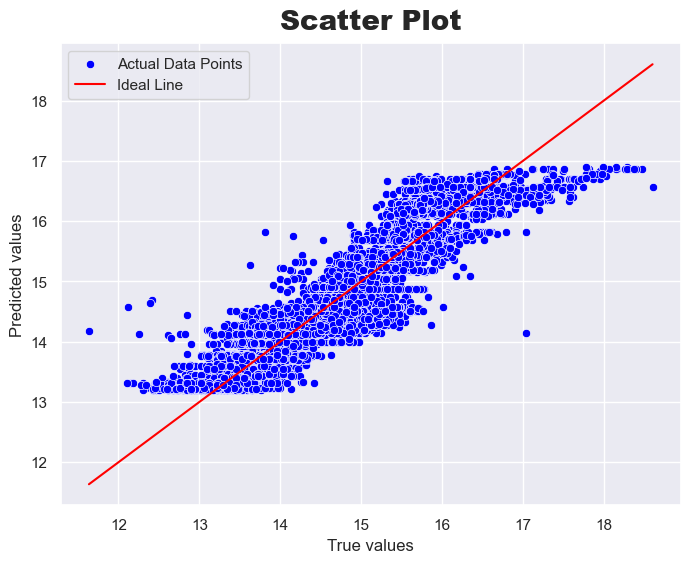

In [80]:
# Creating AdaBoostRegressor Model
model_evaluation(AdaBoostRegressor())

MSE of RandomForestRegressor() model is==>  0.022075893827011438
RMSE of RandomForestRegressor() model is==>  0.14857958751797448


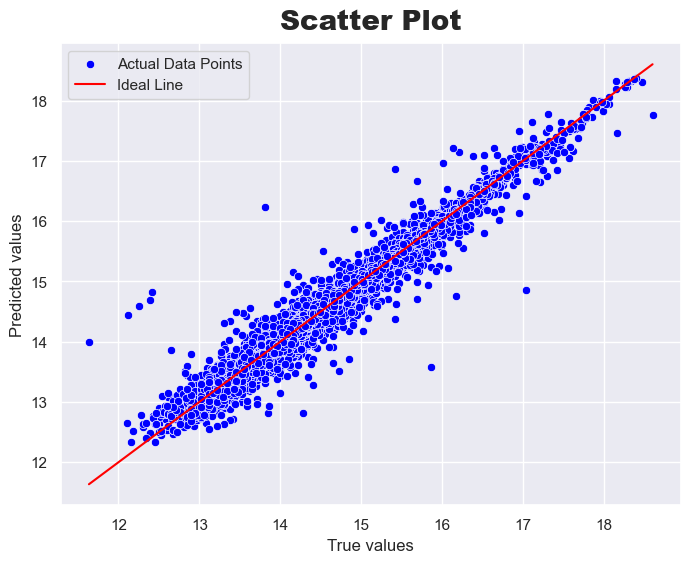

In [81]:
# Creating RandomForestRegressor Model
model_evaluation(RandomForestRegressor())

In [82]:
# Creating a list of models created
models_ceated = ["LinearRegression", "GradientBosstRegressor","AdaBoostRegressor", "RandomForestRegresor"]

# Cerating dataframe of created models with MSE and RMSE values
df_models_created = pd.DataFrame({"Model":models_ceated, "MSE":mse_value, "RMSE":rmse_value})
df_models_created

,Model,MSE,RMSE
0,LinearRegression,0.061991,0.248979
1,GradientBosstRegressor,0.035709,0.188968
2,AdaBoostRegressor,0.165105,0.406331
3,RandomForestRegresor,0.022076,0.148580


###  GradientBosstRegressor and LinearRegression are best models with low MSE and RMSE values